In [1]:
# Improve by ChatGPT & GitHub Copilot
# Running the requierements.ipynb
%run /bettik/PROJECTS/pr-data-ocean/riverama/Notebooks/OSSE_generator/requierements.ipynb

# var(SSH)

In [ ]:
# Loading SSH
ds1 = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60/*_SSH.nc", combine="nested", concat_dim="time_counter", parallel=True)

In [ ]:
ssh = ds1.zos.load() #tarda como 12 minutos

In [ ]:
var_ssh = ssh.var(dim='time_counter', skipna=True)

In [ ]:
var_ssh.to_netcdf("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_ssh.nc")

In [2]:
var_ssh = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_ssh.nc").load()

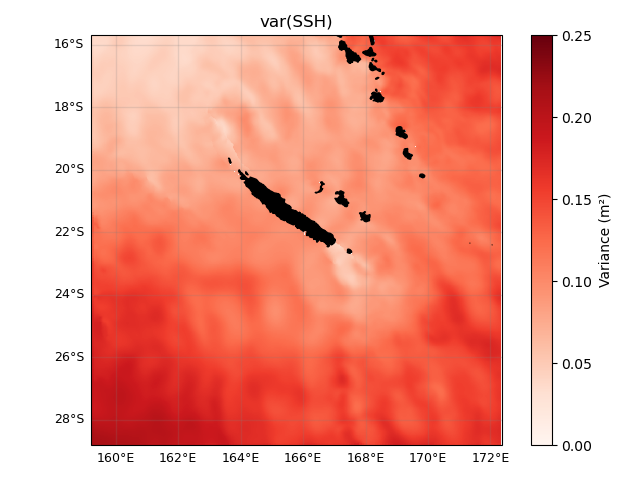

In [3]:

plt.figure(
    #figsize=(12, 10)  # Uncomment and adjust if you want to specify the figure size
)
# Create a plot and get the axis object, setting the projection to PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())

# Here, specify the desired minimum and maximum values for your color scale
min_val = 0  # Example minimum value
max_val = 0.25  # Example maximum value

# Use pcolormesh with the axis object
pcolormesh = ax.pcolormesh(var_ssh['nav_lon'], var_ssh['nav_lat'], var_ssh.zos, cmap='Reds',
                           vmin=min_val, vmax=max_val
                           )
# Add colorbar and label it
cbar = plt.colorbar(pcolormesh, ax=ax)
cbar.set_label('Variance (m²)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('var(SSH)')

# Add land with higher resolution to the main plot on top, filled black
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Add gridlines with labels to the main plot
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# Fix the aspect ratio
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# var(SSHdeDAC)

In [4]:
ds2 = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/CALEDO60_dedac_test/ssh_dedac_masked_*.nc", combine="nested", concat_dim="time_counter", parallel=True)

In [7]:
var_sshdedac = ds2.var(dim='time_counter', skipna=True)

In [8]:
var_sshdedac.to_netcdf("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_sshdedac.nc")

/home/riverama/.conda/envs/env-stage/lib/python3.11/site-packages/dask/array/numpy_compat.py:53: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [5]:
var_sshdedac = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_sshdedac.nc").load()

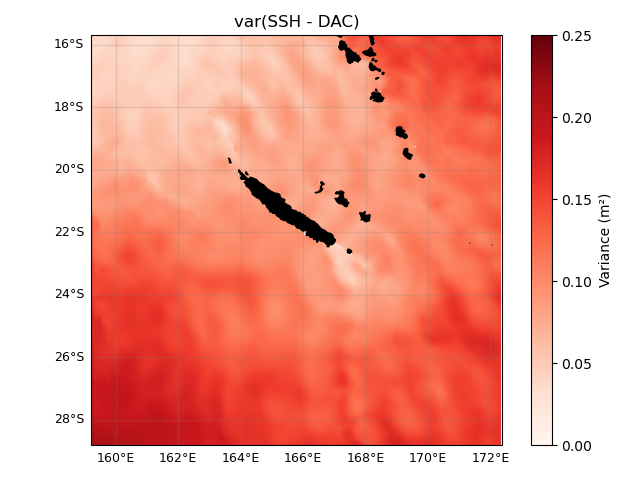

In [6]:
plt.figure(
    #figsize=(12, 10)  # Uncomment and adjust if you want to specify the figure size
)

# Create a plot and get the axis object, setting the projection to PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())

# Here, specify the desired minimum and maximum values for color scale
min_val = 0  # Example minimum value
max_val = 0.25  # Example maximum value

# Use pcolormesh with the axis object, specifying vmin and vmax
pcolormesh = ax.pcolormesh(var_sshdedac['nav_lon'], var_sshdedac['nav_lat'], var_sshdedac.ssh_dedac, cmap='Reds', 
                           vmin=min_val, vmax=max_val
                           )

# Add colorbar and label it
cbar = plt.colorbar(pcolormesh, ax=ax)
cbar.set_label('Variance (m²)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('var(SSH - DAC)')

# Add land with higher resolution to the main plot on top, filled black
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Add gridlines with labels to the main plot
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# Fix the aspect ratio
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# var(SSH) - var(SSH - DAC)

In [ ]:
var_diff = xr.Dataset({'var_diff': var_ssh.zos - var_sshdedac.ssh_dedac})

In [ ]:
var_diff

In [ ]:
var_diff.to_netcdf("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_diff.nc")

In [ ]:
var_diff = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/Datos/varianzas/var_diff.nc").load()

In [ ]:
# Define your custom colormap and normalization
cmap_colors = [(0.294, 0.0, 0.510), (1, 1, 1), (0.698, 0.133, 0.133)]  # Purple, White, Red
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)
custom_cmap.set_bad(color='black')  # Uncomment and adjust if you want to handle NaN values specifically
norm = mcolors.TwoSlopeNorm(vmin=-0.005, vcenter=0, vmax=0.007)

plt.figure()

# Create a plot and get the axis object, setting the projection to PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())

# Use pcolormesh with the axis object, applying the custom colormap and normalization
pcolormesh = ax.pcolormesh(var_diff['nav_lon'], var_diff['nav_lat'], var_diff.var_diff, cmap=custom_cmap, norm=norm)

# Add colorbar and label it
cbar = plt.colorbar(pcolormesh, ax=ax)
cbar.set_label('Variance (m²)')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Difference between var(SSH) and var(SSH - DAC)')

# Add land with higher resolution to the main plot on top, filled black
ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', facecolor='black', zorder=3)

# Add gridlines with labels to the main plot
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.2, linestyle='-')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 9, 'color': 'black'}
gl.ylabel_style = {'size': 9, 'color': 'black'}

# Fix the aspect ratio
ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()